# 4-2C
## 提取1993-2000年中國社會消費品零售總額序列的趨勢效應
### table_a1.17.csv

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt

## 画时序图，ACF，PACF

In [2]:
def drawer(series):
    plt.figure(figsize=(10,8))
    timeseries = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    acf = plt.subplot2grid((2, 2), (1, 0))
    pacf = plt.subplot2grid((2, 2), (1, 1))

    timeseries.plot(series, '*-')
    timeseries.set_title("Analysis")
    smt.graphics.plot_acf(series, lags=None, ax=acf, alpha=0.05)
    smt.graphics.plot_pacf(series, lags=None, ax=pacf, alpha=0.05)

    plt.show()
    plt.close()

## 画比较图

In [3]:
def drawcompare(series, prediction, movestep):
    plt.plot(series, "*-", label='ob')
    plt.plot(range(int(movestep/2), int(movestep/2) + len(prediction)),prediction, label='avg')
    plt.legend()
    plt.show()
    plt.close()

## 计算中心移动平均

In [4]:
def midMovingAverage(series, movestep):
    if(movestep%2==1 and movestep!=1):
        output = [0]
        for i in range(len(series)-(movestep+1)):
            output.append(sum(series[i:i+movestep])/movestep)
        return output #移动项数为奇数时直接返回
    elif(movestep!=1):
        output = []
        for i in range(len(series)-(movestep+1)):
            output.append(sum(series[i:i+movestep])/movestep)
        return midMovingAverage(output, 1) #移动项数为偶数时，再计算一次
    else:
        output = []
        for i in range(len(series)-1):
            output.append(sum(series[i:i+2])/2)
        return output

## 开始分析

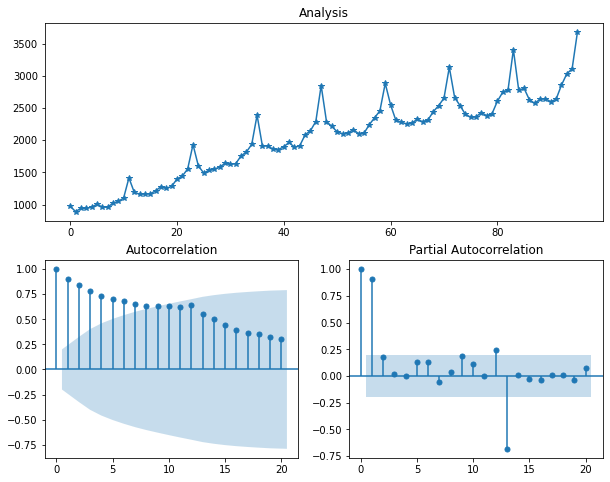

In [5]:
filename = "table_a1.17.csv"
series = pd.read_csv(filename, header=None)
series.iloc[:, 0] = series.iloc[:, 0].astype("float")
series = series.values[:, 0]
drawer(series)

## 提取序列趋势效应

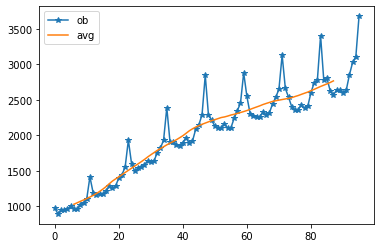

In [6]:
output = midMovingAverage(series, 12)
drawcompare(series, output, 12)